# Investigate Business Hotel using Data Visualization

### Project Overview

"It is crucial for a company to constantly analyze its business performance. On this project, we will analyze deeper into the business in the hotel industry. Our focus is to understand the behavior of our customers when making hotel reservations and its relationship to the cancellation rate of hotel bookings. The insights we discover will be presented in the form of data visualization to make it easier to understand and more persuasive."

### Library and data import

In [61]:
# Library import
import pandas as pd
import plotly.express as py
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go

In [62]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


### Data Overview and Cleansing

In [63]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Data Description
> Booking data
> * Hotel (H1 = Resort Hotel or H2 = City Hotel)
> * is_canceled = Value indicating if the booking was canceled (1) or not (0) 
> * adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
> * lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
> * arrival_date_year = Year of arrival date
> * arrival_date_month = Month of arrival date
> * arrival_date_week_number = Week number of year for arrival date
> * arrival_date_day_of_month = Day of arrival date
> * company = ID of the company/entity that made the booking or responsible for paying the booking.
> * agent = ID of the travel agency that made the booking
> * city = city of the hotel
> * deposit_type = Indication on if the customer made a deposit to guarantee the booking. 
> * days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the customer.
> * distribution_channel = Booking distribution channel.
> * required_car_parking_spaces = Number of car parking spaces required by the customer
> * reservation_status = Reservation last status.
> * reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus
> * stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hote
> * stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
> * total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)

> Customer Data
> * is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
> * adults = Number of adults
> * children = Number of children
> * babies = Number of babies
> * meal = Type of meal booked. 
> * customer_type = Type of booking, assuming one of four categories
> * market_segment = Market segment designation.
> * previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
> * previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking

In [64]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


#### Missing value handling

In [65]:
# Checking the missing value
null = df.isnull().sum().reset_index()
null = null.rename(columns={0:'missing_value', 'index':'column'})
null[null['missing_value']>0]

,column,missing_value
10,children,4
13,city,488
21,agent,16340
22,company,112593


There are several columns that have missing values, so we will handle the missing values as follows:
* For the "children" column, we will fill the missing values with 0.
* For the "city" column, we will fill the missing values with 'others'.
* For the "agent" column, we will fill the missing values with 0, indicating that no travel agent made the booking.
* For the "company" column, we will fill the missing values with 0, indicating that no company made the booking or is responsible for paying the booking.

In [66]:
# Handling missing value
df['children'] = df['children'].fillna('0').astype('int64')
df['city'] = df['city'].fillna('others')
df['agent'] = df['agent'].fillna('0')
df['company'] = df['company'].fillna('0')

In [67]:
# Checking the missing value
df.isnull().sum().sum()

0

#### Correcting the incorrect data

In [68]:
set(df['meal'])

{'Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined'}

There is incorrect data input in the 'meal' column. We will replace the 'undefined' data with 'No meal'.

In [69]:
df['meal'] = df['meal'].replace({'Undefined':'No Meal'})
set(df['meal'])

{'Breakfast', 'Dinner', 'Full Board', 'No Meal'}

#### Drop Unused Records

<Axes: xlabel='adr'>

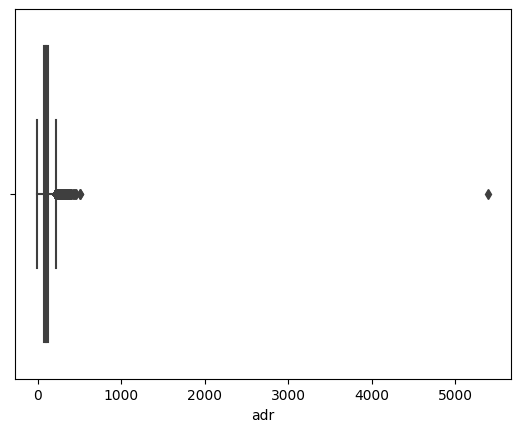

In [70]:
# Checking the distribustion of ard
sns.boxplot(x = df['adr'])

In [71]:
# Checking data with adr is more than 5000
df[df['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
48515,City Hotel,1,35,2018,May,13,25,0,1,2,...,1,Non Refund,12.0,0,0,Personal,5400.0,0,0,Canceled


We can tell that this booking is an incorrect data because it has an extremely high adr with canceled reservation status, so we will drop this record.

In [72]:
# Checking data with negative adr
df[df['adr'] < 0]['adr']

14969   -6.38
Name: adr, dtype: float64

There is negative adr value, so we will drop this row.

In [73]:
# Drop data with negative adr
df = df[df['adr'] >= 0]

In [74]:
# Checking data with no guest
df['total_guest'] = df['children'] + df['adults'] + df['babies']
df[df['total_guest'] == 0][['hotel', 'is_canceled', 'total_guest']]

,hotel,is_canceled,total_guest
2224,Resort Hotel,0,0
2409,Resort Hotel,0,0
3181,Resort Hotel,0,0
3684,Resort Hotel,0,0
3708,Resort Hotel,0,0
...,...,...,...
115029,City Hotel,0,0
115091,City Hotel,0,0
116251,City Hotel,0,0
116534,City Hotel,0,0


180 bookings are not canceled but do not have any guests, so we will drop these record

In [75]:
# Drop booking data that has no guest
df = df[df['total_guest'] != 0]
df.shape

(119209, 30)

* Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)<br>
* Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)<br>
* Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)<br>
* Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya * berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)<br>
* Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)<br>

### Data Analysis

**Ratio of canceled and not canceled booking**

In [142]:
# Ratio of canceled booking
canceled = df.groupby('is_canceled')['hotel'].agg('count').reset_index().rename(columns = {'hotel' : 'count'})
canceled['is_canceled'] = canceled['is_canceled'].replace({1:'Yes', 0:'No'})
canceled

,is_canceled,count
0,No,75010
1,Yes,44199


In [144]:
canceledplot = py.pie(canceled, values=canceled['count'], color=canceled['is_canceled'], names=canceled['is_canceled'], color_discrete_sequence=["#CE7777","#810CA8","#9C254D","#C060A1"], hole=0.5)
canceledplot.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",rotation = -115)
canceledplot.update_layout(width=700, height=500)
canceledplot.update_layout(title="<b>Canceled Booking</b>", title_font=dict(size=16))
canceledplot

**Monthly report by Hotel Type**

In [108]:
# Monthly reservation by hotel type
df['month'] = pd.to_datetime(df['arrival_date_month'], format='%B')
monthly_res = df.groupby(['month','arrival_date_month', 'hotel']).agg(count = ('hotel', 'count')).reset_index().sort_values('month')
monthly_res[['arrival_date_month','hotel','count']]

,arrival_date_month,hotel,count
0,January,City Hotel,4336
1,January,Resort Hotel,2435
2,February,City Hotel,4114
3,February,Resort Hotel,2645
4,March,City Hotel,3730
5,March,Resort Hotel,2191
6,April,City Hotel,4950
7,April,Resort Hotel,3102
8,May,City Hotel,6434
9,May,Resort Hotel,3333


In [118]:
fig = go.Figure()
fig = (py.line(monthly_res, x = 'arrival_date_month', y = 'count', color = 'hotel',color_discrete_sequence=["#CE7777","#810CA8","#9C254D","#C060A1"]))
fig.update_layout(title={
        'text': 'Monthly Reservation by Hotel Type',
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_layout(width=1000, height=500)

fig.add_trace(go.Scatter(x=['July','October'], y=[10000,10000], fill='tozeroy', 
                    mode='none', showlegend = True, fillcolor='rgba(0, 0, 0, 0.2)', opacity=0.1, name = 'end of year'
                    ))
fig.add_annotation(x=7.5, y=10600,
            text="Holiday Season",
            showarrow=False,
            arrowhead=1)
fig.show()